In [ ]:
import pandas as pd
import numpy as np

data = pd.read_csv("neo.csv")

data.head()

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90836 entries, 0 to 90835
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  90836 non-null  int64  
 1   name                90836 non-null  object 
 2   est_diameter_min    90836 non-null  float64
 3   est_diameter_max    90836 non-null  float64
 4   relative_velocity   90836 non-null  float64
 5   miss_distance       90836 non-null  float64
 6   orbiting_body       90836 non-null  object 
 7   sentry_object       90836 non-null  bool   
 8   absolute_magnitude  90836 non-null  float64
 9   hazardous           90836 non-null  bool   
dtypes: bool(2), float64(5), int64(1), object(2)
memory usage: 5.7+ MB


In [3]:
data["relative_velocity"].value_counts()

relative_velocity
34485.841845     2
25338.439042     2
37225.231825     2
36419.712852     2
66082.373737     2
                ..
102750.018447    1
27858.417772     1
18156.451169     1
18470.701216     1
27024.455553     1
Name: count, Length: 90828, dtype: int64

In [4]:
data.describe()

,id,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude
count,9.083600e+04,90836.000000,90836.000000,90836.000000,9.083600e+04,90836.000000
mean,1.438288e+07,0.127432,0.284947,48066.918918,3.706655e+07,23.527103
std,2.087202e+07,0.298511,0.667491,25293.296961,2.235204e+07,2.894086
min,2.000433e+06,0.000609,0.001362,203.346433,6.745533e+03,9.230000
25%,3.448110e+06,0.019256,0.043057,28619.020645,1.721082e+07,21.340000
50%,3.748362e+06,0.048368,0.108153,44190.117890,3.784658e+07,23.700000
75%,3.884023e+06,0.143402,0.320656,62923.604633,5.654900e+07,25.700000
max,5.427591e+07,37.892650,84.730541,236990.128088,7.479865e+07,33.200000


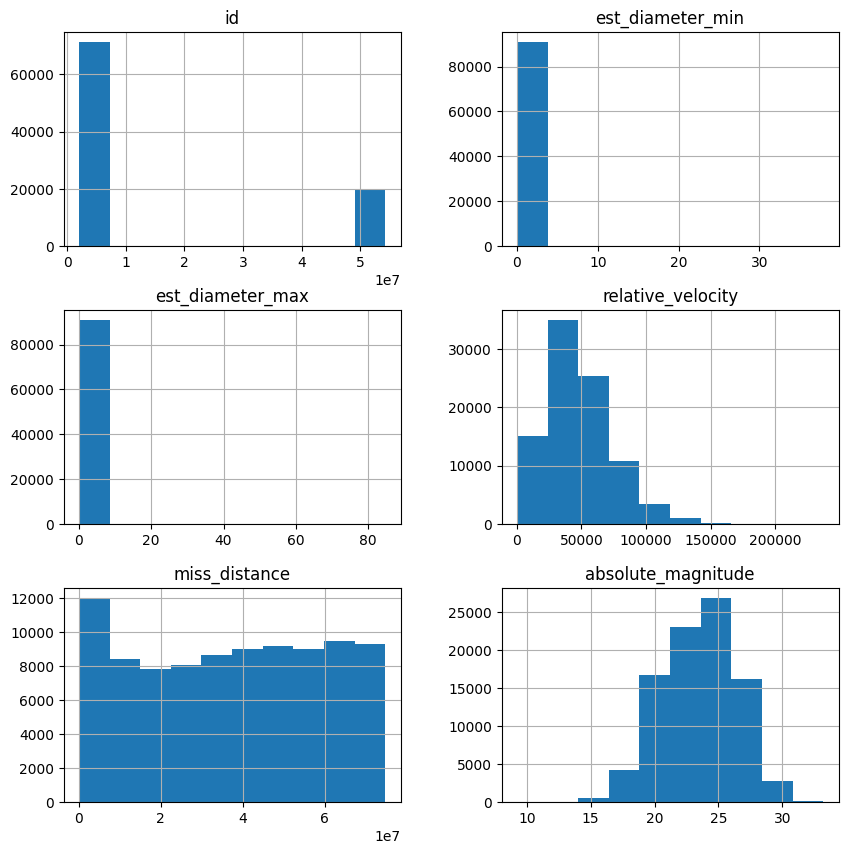

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
data.hist(bins=10, figsize=(10,10))
plt.show()

In [6]:
np.random.seed(13)

def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    
    return data.iloc[train_indices], data.iloc[test_indices]

In [7]:
train_set, test_set = split_train_test(data, 0.3)
len(train_set)

63586

In [8]:
len(test_set)

27250

In [9]:
from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32


def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    
    return data.loc[~in_test_set], data.loc[in_test_set]

In [10]:
data_with_id = data.reset_index()
train_set, test_set = split_train_test_by_id(data_with_id, 0.3, "index")
len(train_set)

63586

In [11]:
len(test_set)

27250

In [12]:
train_set, test_set

(       index        id                 name  est_diameter_min  \
 0          0   2162635  162635 (2000 SS164)          1.198271   
 1          1   2277475    277475 (2005 WK4)          0.265800   
 3          3   3596030          (2012 BV13)          0.096506   
 4          4   3667127          (2014 GE35)          0.255009   
 6          6  54189957          (2021 PY40)          0.171615   
 ...      ...       ...                  ...               ...   
 90829  90829   3587872            (2011 WA)          0.123184   
 90830  90830   3678630         (2014 OL339)          0.069913   
 90832  90832   3837603           (2019 AD3)          0.016771   
 90833  90833  54017201           (2020 JP3)          0.031956   
 90834  90834  54115824           (2021 CN5)          0.007321   
 
        est_diameter_max  relative_velocity  miss_distance orbiting_body  \
 0              2.679415       13569.249224   5.483974e+07         Earth   
 1              0.594347       73588.726663   6.143813

In [13]:
data = data.reset_index()
data_with_id["id"] = data["relative_velocity"] * 1000 + data["miss_distance"]
train_set, test_set = split_train_test_by_id(data_with_id, 0.3, "id")
train_set, test_set

(       index            id                 name  est_diameter_min  \
 0          0  6.840899e+07  162635 (2000 SS164)          1.198271   
 1          1  1.350269e+08    277475 (2005 WK4)          0.265800   
 2          2  1.640574e+08   512244 (2015 YE18)          0.722030   
 3          3  5.019928e+07          (2012 BV13)          0.096506   
 4          4  8.901330e+07          (2014 GE35)          0.255009   
 ...      ...           ...                  ...               ...   
 90831  90831  6.437928e+07           (2016 VX1)          0.026580   
 90832  90832  1.004358e+08           (2019 AD3)          0.016771   
 90833  90833  3.596758e+07           (2020 JP3)          0.031956   
 90834  90834  1.378912e+08           (2021 CN5)          0.007321   
 90835  90835  8.679659e+07           (2021 TW7)          0.039862   
 
        est_diameter_max  relative_velocity  miss_distance orbiting_body  \
 0              2.679415       13569.249224   5.483974e+07         Earth   
 1    

In [14]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(data, test_size=0.3, random_state=13)
train_set, test_set

ModuleNotFoundError: No module named 'sklearn'

In [ ]:
data["age_cat"] = pd.cut(data["Age"],bins=[1, 25, 30, 50, 60, np.inf],labels=[1, 2, 3, 4, 5])
data["age_cat"].hist()

In [ ]:
data["age_cat"].value_counts()

In [ ]:
data["age_cat"].value_counts()